In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from colors import *

In [7]:
def get_flag(name):
    path = "country-flags-main\png100px\{}.png".format(name.title())
    im = plt.imread(path)
    return im

In [8]:
def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.3)
    im.image.axes = ax

    ab = AnnotationBbox(im, (0, coord),  xybox=(-16., -0.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)

In [9]:
cities = ["London", "Chicago", "Paris", "Boston", "Bogota", "Palermo", "Toronto", "New York" ,"Monterrey", "Philadelphia"]
valuesA = [156, 155, 138, 134, 122, 121, 118, 117, 116, 114]
valuesA.reverse()
cities.reverse()

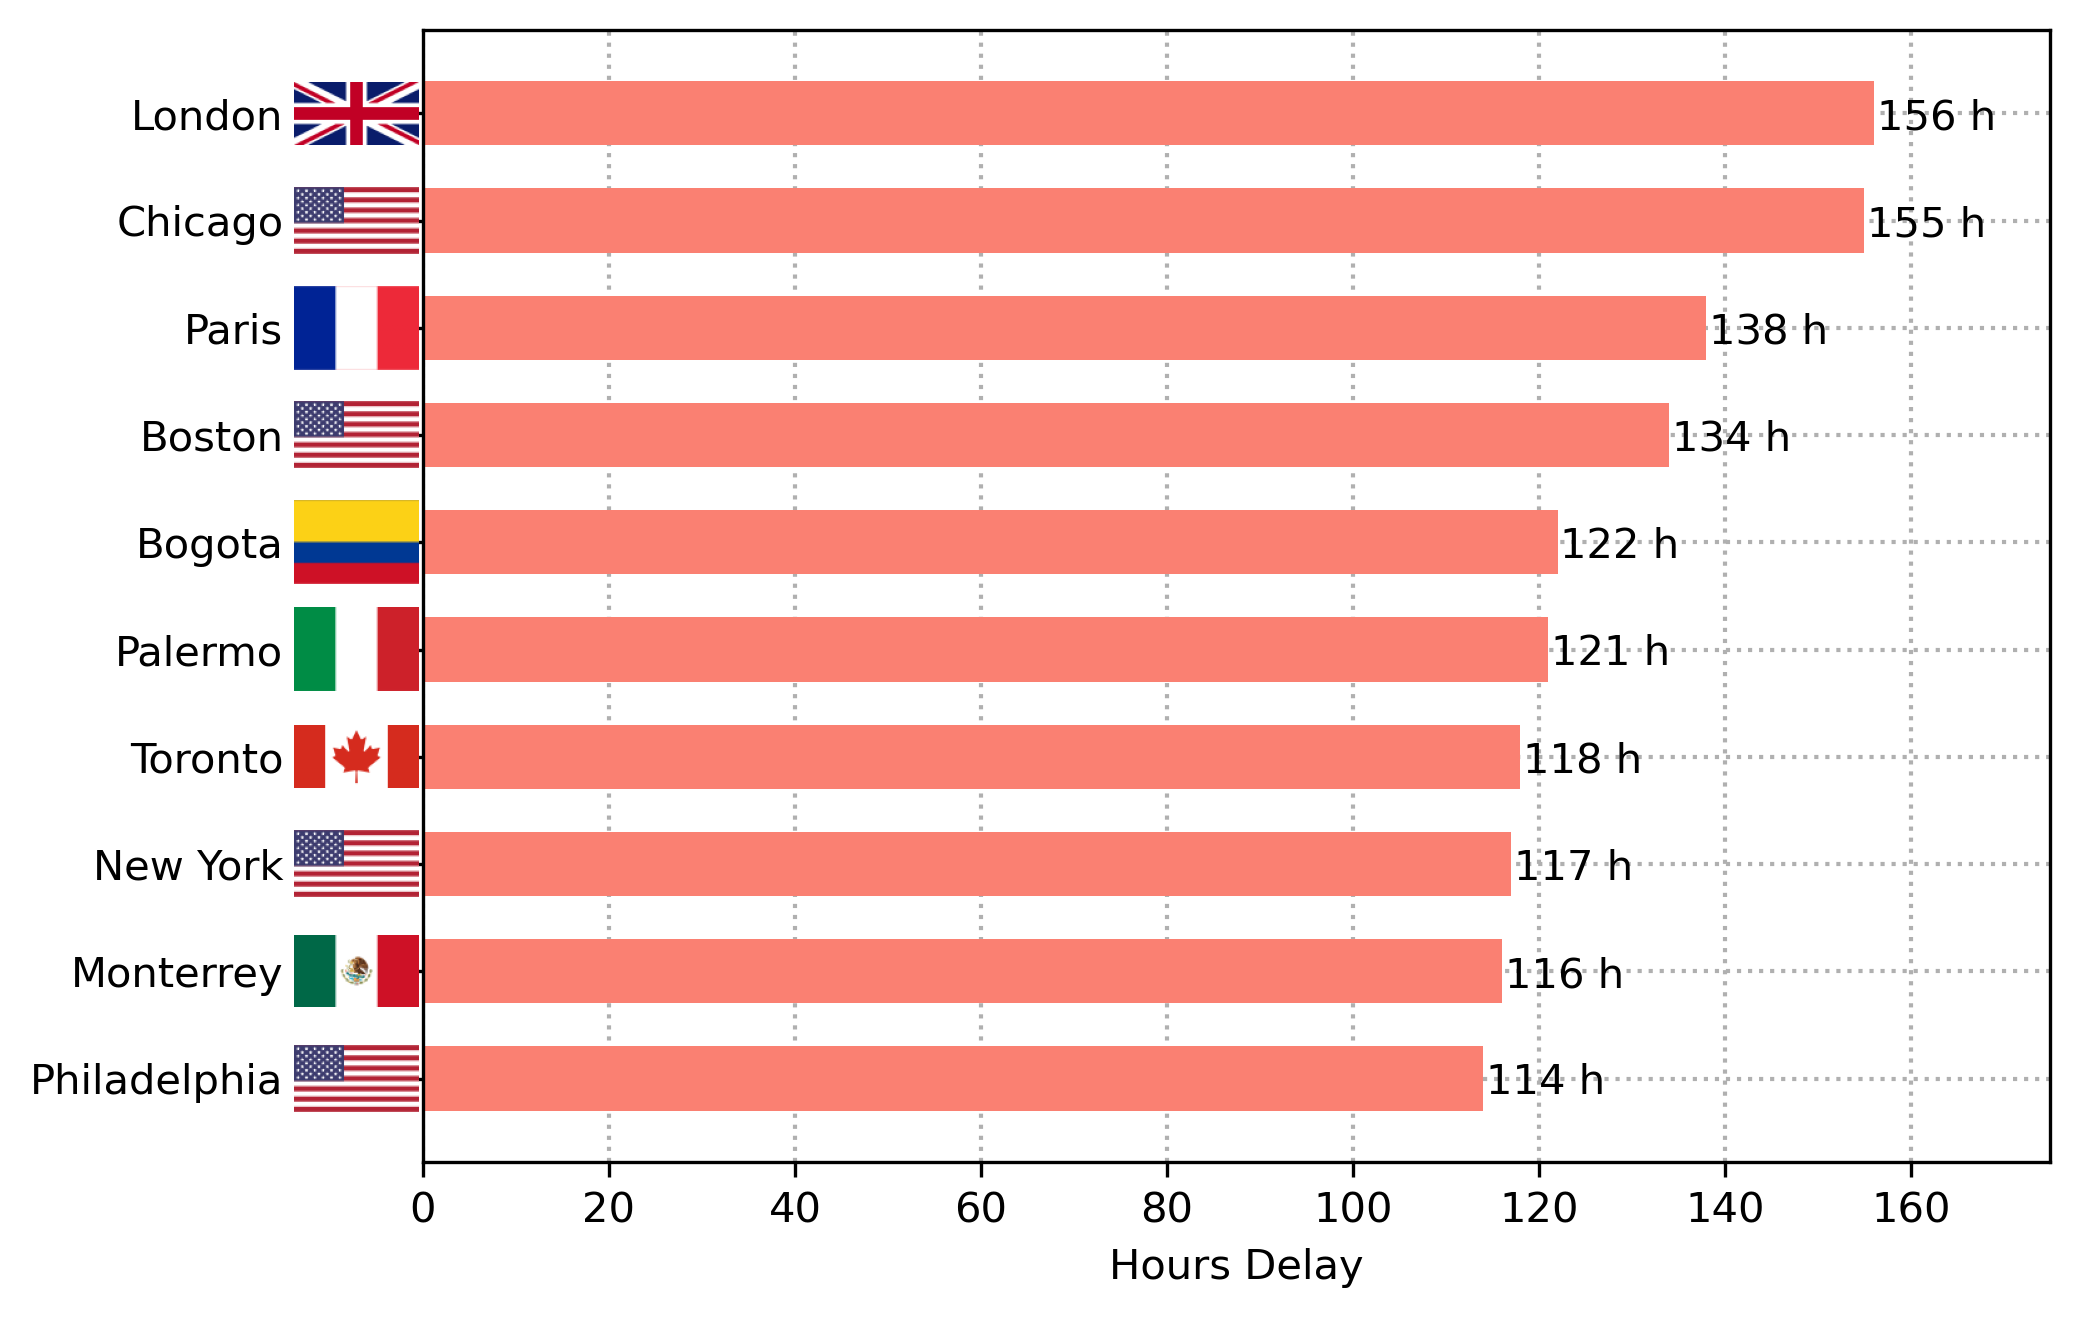

In [10]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=300)

ax.grid(linestyle=':', linewidth=1)
ax.barh(range(len(cities)), valuesA, height=0.6, align="center", color="salmon")
ax.set_yticks(range(len(cities)))
ax.set_yticklabels(cities)
ax.tick_params(axis='y', which='major', pad=30)
ax.set_xlim(0,175)
ax.set_xlabel('Hours Delay')

ax.set_axisbelow(True)

countries = ["gb", "us", "fr", "us", "co", "it", "ca", "us","mx","us"]
countries.reverse()

for i, c in enumerate(countries):
    offset_image(i, c, ax)
    
def add_value_labels(ax, spacing=4):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for i, rect in enumerate(ax.patches):
        # Get X and Y placement of label from rect.
        y_value = valuesA[i]
        x_value = rect.get_y()

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'baseline'


        # Use Y value as label and format number with one decimal place
        label = str(y_value) + " h"
        
        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (y_value, x_value),         # Place label at end of the bar
            xytext=(15, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.savefig('CongestionLevel10.png', bbox_inches='tight')
plt.show()